'data.frame':	74 obs. of  16 variables:
 $ name    : chr  "100%_Bran" "100%_Natural_Bran" "All-Bran" "All-Bran_with_Extra_Fiber" ...
 $ mfr     : chr  "N" "Q" "K" "K" ...
 $ type    : chr  "C" "C" "C" "C" ...
 $ calories: int  70 120 70 50 110 110 110 130 90 90 ...
 $ protein : int  4 3 4 4 2 2 2 3 2 3 ...
 $ fat     : int  1 5 1 0 2 2 0 2 1 0 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  10 2 9 14 1 1.5 1 2 4 5 ...
 $ carbo   : num  5 8 7 8 14 10.5 11 18 15 13 ...
 $ sugars  : int  6 8 5 0 8 10 14 8 6 5 ...
 $ potass  : int  280 135 320 330 -1 70 30 100 125 190 ...
 $ vitamins: int  25 0 25 25 25 25 25 25 25 25 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ weight  : num  1 1 1 1 1 1 1 1.33 1 1 ...
 $ cups    : num  0.33 1 0.33 0.5 0.75 0.75 1 0.75 0.67 0.67 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...


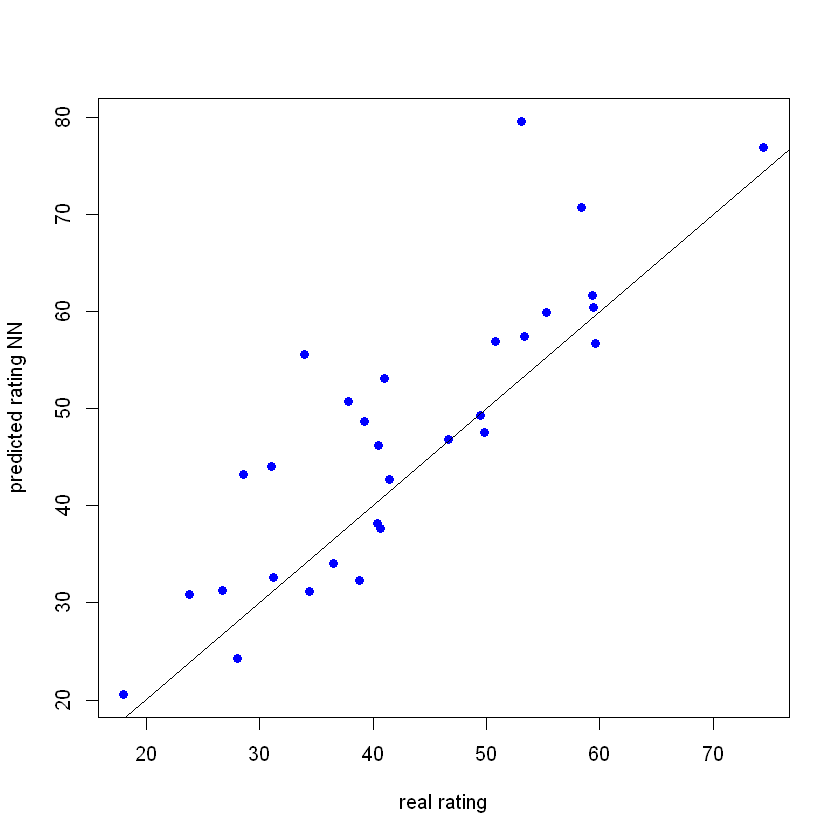

In [2]:
data <- read.csv("C:\\Users\\radha31\\Downloads\\cereals.csv", header = TRUE,
                 stringsAsFactors = FALSE,
                 strip.white = TRUE ,
                 sep = ',')

str(data)
library("dplyr")
data <- data %>% na.omit()

data <- data[c(-1,-2,-3,-13,-14,-15)]
# Random sampling
samplesize = 0.60 * nrow(data)
set.seed(80)
index = sample( seq_len ( nrow ( data ) ), size = samplesize )
# Create training and test set
datatrain = data[ index, ]
datatest = data[ -index, ]


## Scale data for neural network
max = apply(data , 2 , max)
min = apply(data, 2 , min)
scaled = as.data.frame(scale(data, center = min, scale = max - min))

# load library
library(neuralnet)
# creating training and test set
trainNN = scaled[index , ]
testNN = scaled[-index , ]

# fit neural network
set.seed(2)
NN = neuralnet(rating ~ calories + protein + fat + sodium + fiber, trainNN, hidden = 3 , linear.output = T )

# plot neural network
#plot(NN)


predict_testNN = compute(NN, testNN[,c(1:5)])
predict_testNN = (predict_testNN$net.result * (max(data$rating) - min(data$rating))) + min(data$rating)

plot(datatest$rating, predict_testNN, col='blue', pch=16, ylab = "predicted rating NN", xlab = "real rating")

abline(0,1)

# Calculate Root Mean Square Error (RMSE)
RMSE.NN = (sum((datatest$rating - predict_testNN)^2) / nrow(datatest)) ^ 0.5
  